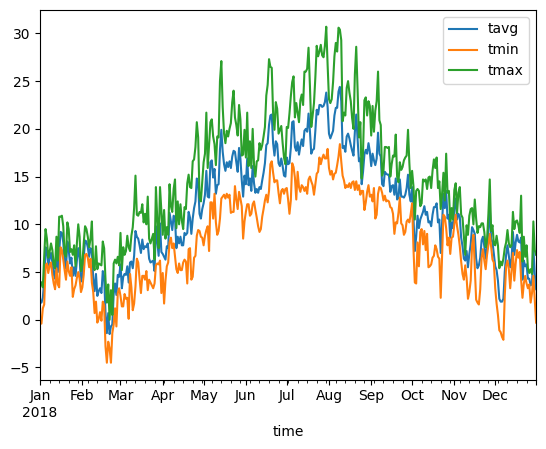

In [1]:
# Perform Feature engineering:

# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Set time period
start = datetime(2018, 1, 1)
end = datetime(2018, 12, 31)

# Create Point for Vancouver, BC
vancouver = Point(49.2497, -123.1193, 70)

# Get daily data for 2018
data = Daily(vancouver, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

#### Usage example of meteostat

In [2]:
from meteostat import Point, Daily
import pandas as pd
from datetime import datetime

# Example DataFrame
data = {
    'latitude': [40.7128, 34.0522],
    'longitude': [-74.0060, -118.2437],
    'date': ['2021-01-01', '2021-01-02']
}
df = pd.DataFrame(data)

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Function to fetch rain data
def fetch_rain_data(row):
    # Create a Point for Meteostat
    location = Point(row['latitude'], row['longitude'])
    
    # Fetch daily data for the location and date
    start = end = row['date']
    data = Daily(location, start, end)
    data = data.fetch()
    
    # Check if there was rain
    if not data.empty and data['prcp'].iloc[0] > 0:
        return 'rain'
    else:
        return 'no rain'

# Apply the function to each row
df['rain_or_no_rain'] = df.apply(fetch_rain_data, axis=1)

print(df)

   latitude  longitude       date rain_or_no_rain
0   40.7128   -74.0060 2021-01-01            rain
1   34.0522  -118.2437 2021-01-02         no rain


In [3]:
import os
import pandas as pd

os.chdir("../")
from src import display_df

In [4]:
data = pd.read_csv("data/features/features_data.csv")

In [5]:
# df = df.head(5)

In [5]:
# display_df(df)

NameError: name 'df' is not defined

##### Get rain for hours range

In [6]:
# from meteostat import Hourly, Point
# from datetime import datetime, timedelta
# import pandas as pd

# def fetch_and_check_rain(latitude, longitude, trip_start_datetime, hour_of_day):
#     # Define location
#     location = Point(latitude, longitude)
    
#     # Calculate start and end times for the range
#     # Using a time range of 4 hours around the specified hour_of_day, (2 hours before and after start of trip)
#     start_time = trip_start_datetime + timedelta(hours=hour_of_day - 2)
#     end_time = trip_start_datetime + timedelta(hours=hour_of_day + 2)
    
#     # Fetch hourly weather data
#     data = Hourly(location, start_time, end_time)
#     data = data.fetch()
    
#     # Check for rain (assuming precipitation > 0 indicates rain)
#     rain_status = data['prcp'].any() > 0
    
#     return 'Rain' if rain_status else 'No Rain'

# # # Example usage
# # latitude = 40.7128  # Example: New York City
# # longitude = -74.0060
# # trip_start_date = datetime(2023, 4, 1)
# # hour_of_day = 12  # Noon

# # # Assuming the trip starts at the beginning of the trip_start_date
# # rain_or_no_rain = fetch_and_check_rain(latitude, longitude, trip_start_date, hour_of_day)
# # print(rain_or_no_rain)

In [7]:
# # Convert trip_start_date to datetime format if it's not already
# df['trip_start_date'] = pd.to_datetime(df['trip_start_date'])

# # Initialize a list to store rain status
# rain_status_list = []

# for index, row in df.iterrows():
#     latitude = row['drivers_lat']
#     longitude = row['drivers_lon']
#     trip_start_datetime = row['trip_start_date']
#     hour_of_day = row['hour_of_day']
#     # Call the function and append the result to the list
#     rain_status = fetch_and_check_rain(latitude, longitude, trip_start_datetime, hour_of_day)
#     rain_status_list.append(rain_status)

# # Add the rain status list as a new column to the DataFrame
# df['rain_status'] = rain_status_list


In [8]:
df = data.tail(1000)

In [9]:
# from concurrent.futures import ThreadPoolExecutor

# from datetime import datetime

# from meteostat import Hourly, Point
# from datetime import datetime, timedelta
# import pandas as pd

# def fetch_and_check_rain(latitude, longitude, trip_start_datetime, hour_of_day):
#     # Define location
#     location = Point(latitude, longitude)
    
#     # Calculate start and end times for the range
#     # Using a time range of 4 hours around the specified hour_of_day, (2 hours before and after start of trip)
#     start_time = trip_start_datetime + timedelta(hours=hour_of_day - 2)
#     end_time = trip_start_datetime + timedelta(hours=hour_of_day + 2)
    
#     # Fetch hourly weather data
#     data = Hourly(location, start_time, end_time)
#     data = data.fetch()
    
#     # Check for rain (assuming precipitation > 0 indicates rain)
#     rain_status = data['prcp'].any() > 0
    
#     return 'Rain' if rain_status else 'No Rain'

# def apply_rain_check(row):
#     latitude = row['drivers_lat']
#     longitude = row['drivers_lon']
#     trip_start_datetime = row['trip_start_date']
#     hour_of_day = row['hour_of_day']
    
#     # Ensure trip_start_datetime is a datetime object
#     if isinstance(trip_start_datetime, str):
#         trip_start_datetime = datetime.strptime(trip_start_datetime, "%Y-%m-%d")  # Adjusted format to match input
    
#     return fetch_and_check_rain(latitude, longitude, trip_start_datetime, hour_of_day)

# # Parallelize the apply function
# def parallel_apply_rain_check(df):
#     with ThreadPoolExecutor(max_workers=1000000) as executor:
#         # Prepare the data for processing
#         rows = [row for index, row in df.iterrows()]
#         # Execute the function in parallel
#         result = list(executor.map(apply_rain_check, rows))
#     return result

# # Apply the parallel function
# df['rain_status'] = parallel_apply_rain_check(df)

In [14]:
import asyncio
from datetime import datetime, timedelta
from meteostat import Hourly, Point
import pandas as pd
import nest_asyncio
nest_asyncio.apply()

# Your existing synchronous function
def fetch_and_check_rain(latitude, longitude, trip_start_datetime, hour_of_day):
    location = Point(latitude, longitude)
    start_time = trip_start_datetime + timedelta(hours=hour_of_day - 2)
    end_time = trip_start_datetime + timedelta(hours=hour_of_day + 2)
    data = Hourly(location, start_time, end_time).fetch()
    rain_status = data['prcp'].any() > 0
    return 'Rain' if rain_status else 'No Rain'

# Asynchronous wrapper for the synchronous function
async def async_fetch_and_check_rain(latitude, longitude, trip_start_datetime, hour_of_day):
    loop = asyncio.get_running_loop()
    # Run the synchronous function in a separate thread
    return await loop.run_in_executor(
        None,  # Executor, None uses the default ThreadPoolExecutor
        fetch_and_check_rain,
        latitude, longitude, trip_start_datetime, hour_of_day
    )

async def apply_rain_check(row):
    return await async_fetch_and_check_rain(
        row['drivers_lat'],
        row['drivers_lon'],
        datetime.strptime(row['trip_start_date'], "%Y-%m-%d"),
        row['hour_of_day']
    )

async def parallel_apply_rain_check(df):
    tasks = [apply_rain_check(row) for index, row in df.iterrows()]
    return await asyncio.gather(*tasks)

# Example usage with a DataFrame
async def main(df):
    results = await parallel_apply_rain_check(df)
    df['rain_status'] = results
    return df

# Assuming df is your DataFrame
# df = pd.DataFrame(...)  # Setup your DataFrame
# Now you can use await directly if you're in a Jupyter Notebook, or adapt as follows for scripts:
await main(df)

,order_id,trip_origin,trip_destination,trip_start_time,trip_end_time,id,driver_id,driver_action,drivers_lat,drivers_lon,...,month,trip_start_date,trip_end_date,trip_origin_latitude,trip_origin_longitude,trip_destination_latitude,trip_destination_longitude,is_weekend,is_holiday,rain_status
1556740,448549,"6.4673481,3.5461676","6.4381033,3.5152952",2021-07-09 20:20:33,2021-07-09 20:21:01,1556741.0,244009.0,rejected,6.447273,3.532118,...,July,2021-07-09,2021-07-09,6.467348,3.546168,6.438103,3.515295,0,0,No Rain
1556741,448549,"6.4673481,3.5461676","6.4381033,3.5152952",2021-07-09 20:20:33,2021-07-09 20:21:01,1556742.0,243250.0,rejected,6.470707,3.565612,...,July,2021-07-09,2021-07-09,6.467348,3.546168,6.438103,3.515295,0,0,No Rain
1556742,448549,"6.4673481,3.5461676","6.4381033,3.5152952",2021-07-09 20:20:33,2021-07-09 20:21:01,1556743.0,244172.0,rejected,6.448012,3.530202,...,July,2021-07-09,2021-07-09,6.467348,3.546168,6.438103,3.515295,0,0,No Rain
1556743,448549,"6.4673481,3.5461676","6.4381033,3.5152952",2021-07-09 20:20:33,2021-07-09 20:21:01,1556744.0,239620.0,rejected,6.477816,3.570944,...,July,2021-07-09,2021-07-09,6.467348,3.546168,6.438103,3.515295,0,0,No Rain
1556744,448549,"6.4673481,3.5461676","6.4381033,3.5152952",2021-07-09 20:20:33,2021-07-09 20:21:01,1556745.0,121981.0,rejected,6.446785,3.546295,...,July,2021-07-09,2021-07-09,6.467348,3.546168,6.438103,3.515295,0,0,No Rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557735,517948,"6.443373599999999,3.5523123","6.500608199999999,3.5981937",2021-09-10 11:47:26,2021-09-10 13:30:13,1557736.0,243774.0,rejected,6.469036,3.566877,...,September,2021-09-10,2021-09-10,6.443374,3.552312,6.500608,3.598194,0,0,No Rain
1557736,517948,"6.443373599999999,3.5523123","6.500608199999999,3.5981937",2021-09-10 11:47:26,2021-09-10 13:30:13,1557737.0,245447.0,rejected,6.425431,3.527358,...,September,2021-09-10,2021-09-10,6.443374,3.552312,6.500608,3.598194,0,0,No Rain
1557737,517948,"6.443373599999999,3.5523123","6.500608199999999,3.5981937",2021-09-10 11:47:26,2021-09-10 13:30:13,1557738.0,239866.0,rejected,6.440013,3.525378,...,September,2021-09-10,2021-09-10,6.443374,3.552312,6.500608,3.598194,0,0,No Rain
1557738,517948,"6.443373599999999,3.5523123","6.500608199999999,3.5981937",2021-09-10 11:47:26,2021-09-10 13:30:13,1557739.0,243774.0,rejected,6.469036,3.566877,...,September,2021-09-10,2021-09-10,6.443374,3.552312,6.500608,3.598194,0,0,No Rain


In [11]:
display_df(df, 10)

| order_id   | trip_origin         | trip_destination            | trip_start_time     | trip_end_time       | id          | driver_id   | driver_action   | drivers_lat   | drivers_lon   | day_of_week   | hour_of_day   | day_of_month   | month   | trip_start_date   | trip_end_date   | trip_origin_latitude   | trip_origin_longitude   | trip_destination_latitude   | trip_destination_longitude   | is_weekend   | is_holiday   | rain_status   |
|:-----------|:--------------------|:----------------------------|:--------------------|:--------------------|:------------|:------------|:----------------|:--------------|:--------------|:--------------|:--------------|:---------------|:--------|:------------------|:----------------|:-----------------------|:------------------------|:----------------------------|:-----------------------------|:-------------|:-------------|:--------------|
| 448549     | 6.4673481,3.5461676 | 6.4381033,3.5152952         | 2021-07-09 20:20:33 | 2021-07-09 20:21:01 | 1